In [1]:
from model import Model

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import h5py
import numpy as np

In [4]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:])
train_y_orig = np.array(train_dataset["train_set_y"][:])

In [5]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y_orig.shape))

Number of training examples: 209
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (209,)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
train_y = train_y_orig.reshape(1, 209)
print ("train_x's shape: " + str(train_x.shape))

train_x's shape: (12288, 209)


In [7]:
train_test_image = train_x.T[7].T.reshape(-1, 1)
print(train_test_image.shape)

(12288, 1)


In [8]:
layers_dims = [12288, 20, 7, 5, 1]

In [9]:
print(train_x.shape)

(12288, 209)


In [10]:
cat_model = Model(layers_dims)

In [11]:
cat_model.train_model(train_x, train_y, .0075, 2500)

Cost after iteration 0 = 0.646415890876514
Cost after iteration 100 = 0.5095001049209068
Cost after iteration 200 = 0.45172841622719506
Cost after iteration 300 = 0.3919910116246459
Cost after iteration 400 = 0.3548575745639286
Cost after iteration 500 = 0.2609132546348791
Cost after iteration 600 = 0.1752601820932404
Cost after iteration 700 = 0.14581302236745797
Cost after iteration 800 = 0.6439600281844818
Cost after iteration 900 = 0.0629823425511603
Cost after iteration 1000 = 0.035834730943272886
Cost after iteration 1100 = 0.02535831829248466
Cost after iteration 1200 = 0.01873386402393821
Cost after iteration 1300 = 0.014593267811348256
Cost after iteration 1400 = 0.011699814676116112
Cost after iteration 1500 = 0.009691107892104358
Cost after iteration 1600 = 0.008201604907326446
Cost after iteration 1700 = 0.007035376487868236
Cost after iteration 1800 = 0.00613577397859676
Cost after iteration 1900 = 0.00542372412298484
Cost after iteration 2000 = 0.004830457505399857
Cost a

In [14]:
test_img = Image.open("cat_test.jpg").convert("RGB")
test_img = test_img.resize((64, 64))
test_img_array = np.array(test_img)
test_img_norm = test_img_array / 255.0
test_img_flat = test_img_norm.reshape(-1, 1) 

In [15]:
result = cat_model.predict(test_img_flat)
print(result)

1


It's a cat!


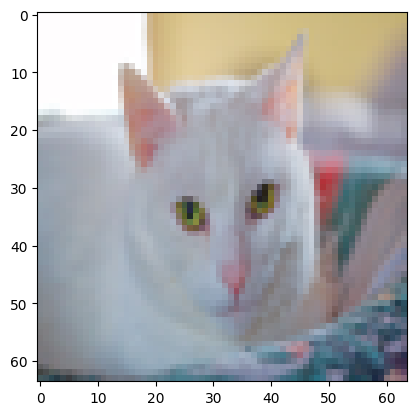

In [16]:
if result == 1:
    print("It's a cat!")
else:
    print("Not a cat...")

plt.imshow(test_img_flat.reshape(64, 64, 3))